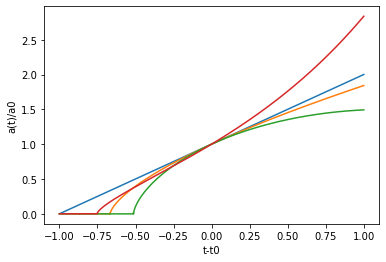

In [52]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.ion()

omega_m = np.array([0.0,1.0,3.0,0.23])
omega_l = np.array([0.0,0.0,0.0,0.73])

N = 10000
H0 = 1.0

t_back = np.linspace(-1,0,N+1)
t_forw = np.linspace(0,1,N+1)
dt = t_forw[3] - t_forw[2]
a_forw = np.zeros(N+1)
a_back = np.zeros(N+1)
a_back[N] = 1.0
a_forw[0] = 1.0


def solve_f(m, l):
    for i in range(0,N):
        ff = (m/(a_forw[i]**3)) + (l) + ((1-m)/(a_forw[i]**2))
        a = a_forw[i] + dt*a_forw[i]*H0*math.sqrt(abs(ff))
        fa = (m/(a**3)) + (l) + ((1-m)/(a**2))
        if(fa and ff >=0):
            a = a_forw[i] + dt*a_forw[i]*H0*math.sqrt(abs(ff))
            a_forw[i+1] = a_forw[i] + 0.5*dt*(a_forw[i]*H0*math.sqrt(abs(ff)) + a*H0*math.sqrt(abs(fa)))
        else:
            a = a_forw[i] - dt*a_forw[i]*H0*math.sqrt(abs(ff))
            a_forw[i+1] = a_forw[i] - 0.5*dt*(a_forw[i]*H0*math.sqrt(abs(ff)) + a*H0*math.sqrt(abs(fa)))
        
def solve_b(m, l):
    for i in range(N,-1,-1):
        bb = (m/(a_back[i]**3)) + (l) + ((1-m)/(a_back[i]**2))
        a = a_back[i] - dt*a_back[i]*H0*(math.sqrt(abs(bb)))
        ba = (m/(a**3)) + (l) + ((1-m)/(a**2))
        if(a_back[i] <= 0.00001):
            return
        a_back[i-1] = a_back[i] - 0.5*dt*(a_back[i]*H0*math.sqrt(abs(bb)) + a*H0*math.sqrt(abs(ba)))
        
        
for i in range(0,4):
    a_forw = np.zeros(N+1)
    a_back = np.zeros(N+1)
    a_back[N] = 1.0
    a_forw[0] = 1.0
    
    solve_f(omega_m[i], omega_l[i])
    solve_b(omega_m[i], omega_l[i])

    x = np.concatenate([t_back,t_forw])
    y = np.concatenate([a_back,a_forw])
    plt.plot(x,y)
    plt.xlabel("t-t0")
    plt.ylabel("a(t)/a0")
    #plt.xlim([-0.25,0.25])
    #plt.ylim([0.8,1.3])


## Problem 1.1 

In [53]:
# all imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


tH = 13.87   # hubble time
t0 = 13.7    # age of the universe
a0 = 1.0     # a(t0) at present time

def fried(a,omega_M = 0.3, omega_lam = 0.7, omega_R = 1e-5):
    omega0 = omega_M+omega_lam+omega_R
    
    if omega0>1 :    # closed universe condition
        amax = omega_M/(omega0-1)
        a = amax - abs(amax-a)
        
    temp = omega_R*((a0/a)**4) + omega_M*((a0/a)**3) + omega_lam + (1-omega0)*(a0/a)**2
    return 1/(a*abs(temp)**0.5)

The following code adopted from Kishan Deka.

In [54]:
omega_M = 0.27                    # omega matter
omega_lam = 0.73                  # omega vacuum energy
omega_phot = 5.04*1e-5/(1.01)**2   # omega_photon

time = 0
# time passed since start of vacuum dominated universe
at = (omega_M/omega_lam)**(1/3)
time,_ = quad(fried,at,a0,args=(omega_M,omega_lam,0))
print(r'(a)Time passed since universe became vacuum dominated : %0.2f Gyr' %(time*tH))

time = 0
# time spent in the matter dominated epoch
aeq = 1.68*omega_phot/omega_M
at = (omega_M/omega_lam)**(1/3)
time,_ = quad(fried,aeq,at,args=(omega_M,omega_lam,0))
print(r'(b)Time spent in the matter dominated epoch : %0.2f Gyr' %(time*tH))

time = 0
# time spent in radiation dominated epoch
aeq = 1.68*omega_phot/omega_M
ainf = 1e-28
time,_ = quad(fried,ainf,aeq,args=(omega_M,omega_lam,0))
print(r'(c)Time spent in the radiation dominated epoch : %0.3f Myr' %(time*tH*1e3))

time = 0
# age of universe when first nuclei formed
anuc = 3e-9
time,_ = quad(fried,a0,anuc,args=(omega_M,omega_lam,0))
print(r'(d)Time when first nuclei formed : %0.2f Gyr' %((a0+time)*tH))

(a)Time passed since universe became vacuum dominated : 4.23 Gyr
(b)Time spent in the matter dominated epoch : 9.54 Gyr
(c)Time spent in the radiation dominated epoch : 0.096 Myr
(d)Time when first nuclei formed : 0.10 Gyr
